In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def generate_data(title, mean, sigma, count):
    data = mean + sigma * np.random.randn(count)
#     n, bins, patches = plt.hist(data, 50, normed=1, facecolor='g', alpha=0.75)
#     plt.xlabel('Values')
#     plt.ylabel('Probability')
#     plt.title('{0} (mean={1}, sigma={2}, count={3})'.format(title, mean, sigma, count))
#     plt.grid(True)
#     plt.show()
    return data

In [3]:
test = [
    ['A', 'Coke', 7, 100, 200, 200],
    ['B', 'Pepsi', 6, 200, 10, 100],
    ['C', '7Up', 5, 200, 10, 100],
    ['D', 'Sprite', 4, 400, 10, 200],
    ['E', 'Latte', 3, 800, 10, 100],
    ['F', 'Espresso', 2, 800, 10, 100],
    ['G', 'Cappuccino', 1, 900, 400, 200],
]

In [4]:
dataset = []
for i in test:
    drink, rank, mean, sigma, count = i[1], i[2], i[3], i[4], i[5]
    
    amount_data = generate_data(drink, mean, sigma, count)
    
    for amount in amount_data:
        dataset.append([drink, rank ,amount])

In [5]:
df = pd.DataFrame(np.array(dataset), columns=['Drink', 'Rank', 'Amount'])
df = df.astype({'Rank': 'int32', 'Amount': 'float64'})

df

,Drink,Rank,Amount
0,Coke,7,178.010485
1,Coke,7,96.245906
2,Coke,7,30.094969
3,Coke,7,-89.863554
4,Coke,7,497.105801
5,Coke,7,-196.839322
6,Coke,7,184.858308
7,Coke,7,272.829289
8,Coke,7,5.185640
9,Coke,7,141.990002


# 資料前置處理

In [6]:

distance_matrix = [
    [0, 1, 1, 1, 2, 2, 2], # Coke
    [1, 0, 1, 1, 2, 2, 2], # Pepsi
    [1, 1, 0, 1, 2, 2, 2], # 7Up
    [1, 1, 1, 0, 2, 2, 2], # Sprite
    [2, 2, 2, 2, 0, 1, 1], # Latte
    [2, 2, 2, 2, 1, 0, 1], # Espresso
    [2, 2, 2, 2, 1, 1, 0], # Cappuccino
]

dist = []
for row in df.to_numpy():
    newRow = []
    
    distance_matrix_index = None
    if (row[0] == 'Coke'):
        distance_matrix_index = 0
    if (row[0] == 'Pepsi'):
        distance_matrix_index = 1
    if (row[0] == '7Up'):
        distance_matrix_index = 2
    if (row[0] == 'Sprite'):
        distance_matrix_index = 3
    if (row[0] == 'Latte'):
        distance_matrix_index = 4
    if (row[0] == 'Espresso'):
        distance_matrix_index = 5
    if (row[0] == 'Cappuccino'):
        distance_matrix_index = 6
    
    newRow.append(row[1])
    newRow.append(row[2])
    newRow += distance_matrix[distance_matrix_index]
    
    dist.append(newRow)

dist = pd.DataFrame(np.array(dist), columns=['Rank', 'Amount', 'Drink_Coke', 'Drink_Pepsi', 'Drink_7Up', 'Drink_Sprite', 'Drink_Latte', 'Drink_Espresso', 'Drink_Cappuccino'])
dist

,Rank,Amount,Drink_Coke,Drink_Pepsi,Drink_7Up,Drink_Sprite,Drink_Latte,Drink_Espresso,Drink_Cappuccino
0,7.0,178.010485,0.0,1.0,1.0,1.0,2.0,2.0,2.0
1,7.0,96.245906,0.0,1.0,1.0,1.0,2.0,2.0,2.0
2,7.0,30.094969,0.0,1.0,1.0,1.0,2.0,2.0,2.0
3,7.0,-89.863554,0.0,1.0,1.0,1.0,2.0,2.0,2.0
4,7.0,497.105801,0.0,1.0,1.0,1.0,2.0,2.0,2.0
5,7.0,-196.839322,0.0,1.0,1.0,1.0,2.0,2.0,2.0
6,7.0,184.858308,0.0,1.0,1.0,1.0,2.0,2.0,2.0
7,7.0,272.829289,0.0,1.0,1.0,1.0,2.0,2.0,2.0
8,7.0,5.185640,0.0,1.0,1.0,1.0,2.0,2.0,2.0
9,7.0,141.990002,0.0,1.0,1.0,1.0,2.0,2.0,2.0


In [7]:
oneOfK = pd.get_dummies(df)
oneOfK

,Rank,Amount,Drink_7Up,Drink_Cappuccino,Drink_Coke,Drink_Espresso,Drink_Latte,Drink_Pepsi,Drink_Sprite
0,7,178.010485,0,0,1,0,0,0,0
1,7,96.245906,0,0,1,0,0,0,0
2,7,30.094969,0,0,1,0,0,0,0
3,7,-89.863554,0,0,1,0,0,0,0
4,7,497.105801,0,0,1,0,0,0,0
5,7,-196.839322,0,0,1,0,0,0,0
6,7,184.858308,0,0,1,0,0,0,0
7,7,272.829289,0,0,1,0,0,0,0
8,7,5.185640,0,0,1,0,0,0,0
9,7,141.990002,0,0,1,0,0,0,0


In [8]:
from sklearn.preprocessing import scale

dist_data = scale(dist)
print(dist_data)

oneOfK_data = scale(oneOfK)
print(oneOfK_data)

[[ 1.39875721 -0.82052232 -1.60356745 ...  0.74535599  0.74535599
   0.75      ]
 [ 1.39875721 -1.04517728 -1.60356745 ...  0.74535599  0.74535599
   0.75      ]
 [ 1.39875721 -1.22693245 -1.60356745 ...  0.74535599  0.74535599
   0.75      ]
 ...
 [-1.39875721  2.43701871  1.06904497 ... -0.74535599 -0.74535599
  -1.75      ]
 [-1.39875721  1.82050932  1.06904497 ... -0.74535599 -0.74535599
  -1.75      ]
 [-1.39875721  3.36290733  1.06904497 ... -0.74535599 -0.74535599
  -1.75      ]]
[[ 1.39875721 -0.82052232 -0.33333333 ... -0.33333333 -0.33333333
  -0.5       ]
 [ 1.39875721 -1.04517728 -0.33333333 ... -0.33333333 -0.33333333
  -0.5       ]
 [ 1.39875721 -1.22693245 -0.33333333 ... -0.33333333 -0.33333333
  -0.5       ]
 ...
 [-1.39875721  2.43701871 -0.33333333 ... -0.33333333 -0.33333333
  -0.5       ]
 [-1.39875721  1.82050932 -0.33333333 ... -0.33333333 -0.33333333
  -0.5       ]
 [-1.39875721  3.36290733 -0.33333333 ... -0.33333333 -0.33333333
  -0.5       ]]


# MDS 資料降維

In [9]:
from sklearn.manifold import TSNE

In [10]:
embeddingWithDist = TSNE(n_components=2)
dist_data = embeddingWithDist.fit_transform(dist_data)

In [11]:
embeddingWith1ofk = TSNE(n_components=2)
oneOfK_data = embeddingWith1ofk.fit_transform(oneOfK_data)

# 實驗結果

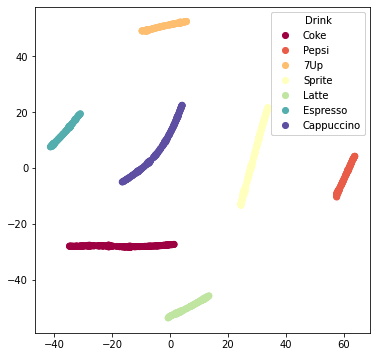

In [12]:

plt.figure(figsize=(6,6))
ax = plt.subplot(111)

# 加上點
scatter = ax.scatter(dist_data[:, 0], dist_data[:, 1], c=dist.to_numpy()[:, 0], cmap=plt.cm.Spectral)

# 加上圖例
legend_elements = []
legend_elements.append(scatter.legend_elements()[0])
legend_elements.append([row[1] for row in test])
legend_elements = tuple(legend_elements)
legend1 = ax.legend(*legend_elements, loc="upper right", title="Drink")
ax.add_artist(legend1)

plt.show()

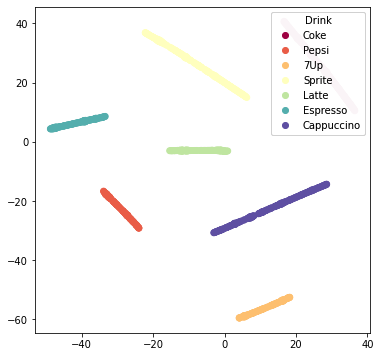

In [13]:

fig, ax = plt.subplots(1, figsize=(6,6))

# 加上點
scatter = ax.scatter(oneOfK_data[:, 0], oneOfK_data[:, 1], c=dist.to_numpy()[:, 0], cmap=plt.cm.Spectral)

# 加上圖例
legend_elements = []
legend_elements.append(scatter.legend_elements()[0])
legend_elements.append([row[1] for row in test])
legend_elements = tuple(legend_elements)
legend1 = ax.legend(*legend_elements, loc="upper right", title="Drink")
ax.add_artist(legend1)


plt.show()

In [14]:
import plotly
from plotly.graph_objs import Scatter, Layout
import plotly.graph_objs as go

In [15]:
plotly.offline.init_notebook_mode(connected=True)

In [16]:
dist_data_x = []
dist_data_y = []
for i in dist_data:
    dist_data_x.append(i[0])
    dist_data_y.append(i[1])

In [17]:
trace0 = go.Scatter(
    x = dist_data_x[:200],
    y = dist_data_y[:200],
    mode = 'markers',
    name = 'Coke'
)
trace1 = go.Scatter(
    x = dist_data_x[200:300],
    y = dist_data_y[200:300],
    mode = 'markers',
    name = 'Pepsi'
)
trace2 = go.Scatter(
    x = dist_data_x[300:400],
    y = dist_data_y[300:400],
    mode = 'markers',
    name = '7Up'
)
trace3 = go.Scatter(
    x = dist_data_x[400:600],
    y = dist_data_y[400:600],
    mode = 'markers',
    name = 'Sprite'
)
trace4 = go.Scatter(
    x = dist_data_x[600:700],
    y = dist_data_y[600:700],
    mode = 'markers',
    name = 'Latte'
)
trace5 = go.Scatter(
    x = dist_data_x[700:800],
    y = dist_data_y[700:800],
    mode = 'markers',
    name = 'Espresso'
)
trace6 = go.Scatter(
    x = dist_data_x[800:1000],
    y = dist_data_y[800:1000],
    mode = 'markers',
    name = 'Cappuccino'
)

data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]

In [18]:
plotly.offline.iplot(data, filename='scatter1')

In [19]:
oneOfK_data_x = []
oneOfK_data_y = []
for i in oneOfK_data:
    oneOfK_data_x.append(i[0])
    oneOfK_data_y.append(i[1])

In [20]:
trace0 = go.Scatter(
    x = oneOfK_data_x[:200],
    y = oneOfK_data_y[:200],
    mode = 'markers',
    name = 'Coke'
)
trace1 = go.Scatter(
    x = oneOfK_data_x[200:300],
    y = oneOfK_data_y[200:300],
    mode = 'markers',
    name = 'Pepsi'
)
trace2 = go.Scatter(
    x = oneOfK_data_x[300:400],
    y = oneOfK_data_y[300:400],
    mode = 'markers',
    name = '7Up'
)
trace3 = go.Scatter(
    x = oneOfK_data_x[400:600],
    y = oneOfK_data_y[400:600],
    mode = 'markers',
    name = 'Sprite'
)
trace4 = go.Scatter(
    x = oneOfK_data_x[600:700],
    y = oneOfK_data_y[600:700],
    mode = 'markers',
    name = 'Latte'
)
trace5 = go.Scatter(
    x = oneOfK_data_x[700:800],
    y = oneOfK_data_y[700:800],
    mode = 'markers',
    name = 'Espresso'
)
trace6 = go.Scatter(
    x = oneOfK_data_x[800:1000],
    y = oneOfK_data_y[800:1000],
    mode = 'markers',
    name = 'Cappuccino'
)

data2 = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]

In [21]:
plotly.offline.iplot(data2, filename='scatter2')